## Bimodal and Multimodal Distributions
Bimodal and multimodal distributions are types of probability distributions that have two or more modes (peaks) in their frequency distribution. These distributions can arise in various contexts, such as when data is collected from different populations or when there are distinct subgroups within a dataset.

Characteristics:

- Bimodal Distribution:
  - Contains two distinct modes.
  - May indicate the presence of two different groups within the data.
  - Example: Test scores of two different classes.

- Multimodal Distribution:
  - Contains multiple modes.
  - Can indicate more complex underlying processes.
  - Example: Customer purchase behavior across different product categories.

Real-world examples:

- Heights of adults (men and women)
- Exam scores (prepared vs unprepared students)
- Customer spending (casual vs premium)

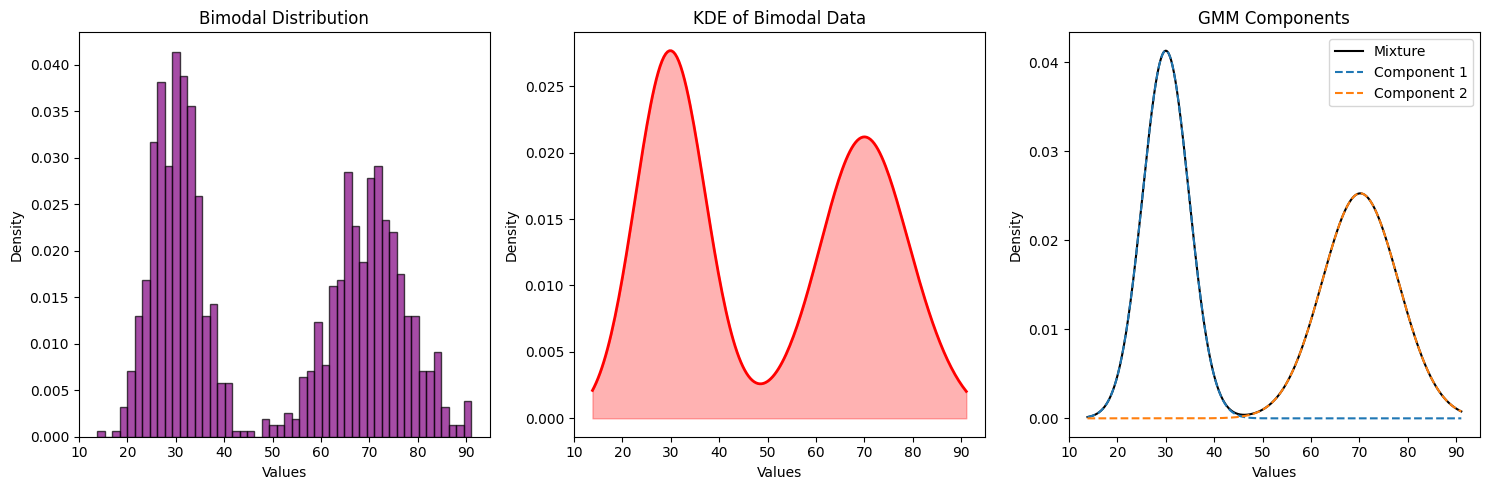

Bimodal Data Analysis:
Number of peaks (modes): 2
Overall mean: 50.14
Overall median: 48.61
Component means: [29.98049039 70.18211748]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.mixture import GaussianMixture

# Create bimodal data by mixing two normal distributions
np.random.seed(42)

# Two different subpopulations
population1 = np.random.normal(loc=30, scale=5, size=500)   # First peak at ~30
population2 = np.random.normal(loc=70, scale=8, size=500)   # Second peak at ~70

bimodal_data = np.concatenate([population1, population2])

# Plot bimodal distribution
plt.figure(figsize=(15, 5))

# Histogram
plt.subplot(1, 3, 1)
plt.hist(bimodal_data, bins=50, alpha=0.7, color='purple', edgecolor='black', density=True)
plt.title('Bimodal Distribution')
plt.xlabel('Values')
plt.ylabel('Density')

# Kernel Density Estimation
plt.subplot(1, 3, 2)
from scipy.stats import gaussian_kde
kde = gaussian_kde(bimodal_data)
x_vals = np.linspace(bimodal_data.min(), bimodal_data.max(), 200)
plt.plot(x_vals, kde(x_vals), 'r-', linewidth=2)
plt.fill_between(x_vals, kde(x_vals), alpha=0.3, color='red')
plt.title('KDE of Bimodal Data')
plt.xlabel('Values')
plt.ylabel('Density')

# Gaussian Mixture Model to identify components
plt.subplot(1, 3, 3)
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(bimodal_data.reshape(-1, 1))

# Plot individual components
x_vals = np.linspace(bimodal_data.min(), bimodal_data.max(), 1000).reshape(-1, 1)
logprob = gmm.score_samples(x_vals)
responsibilities = gmm.predict_proba(x_vals)
pdf = np.exp(logprob)

plt.plot(x_vals, pdf, '-k', label='Mixture')
plt.plot(x_vals, responsibilities[:, 0] * pdf, '--', label='Component 1')
plt.plot(x_vals, responsibilities[:, 1] * pdf, '--', label='Component 2')
plt.title('GMM Components')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

print("Bimodal Data Analysis:")
print(f"Number of peaks (modes): 2")
print(f"Overall mean: {bimodal_data.mean():.2f}")
print(f"Overall median: {np.median(bimodal_data):.2f}")
print(f"Component means: {gmm.means_.flatten()}")